# Events and Eyeblinks
This week we've seen data that is contaminated with a number of eyeblinks. These would make it very difficult to run analyses on our data (imagine if the person blinked their eyes every time we showed them a picture. We would conclude that the brain was high, but most of it would be *confounded*  with the eyeblinks.

In this lab, we'll use the same eyeblink detection algorithm shown in the lecture, and use it to subtract out the eyeblinks from the data. This will be an important step in data analysis because we'll start playing with event-related brain activity.

# The data
We'll use two datasets today. The first dataset is the same that we've gone through in lecture (EEG data). The second is an ECoG dataset. We'll compare what eyeblinks look like in one vs. the other data type.

In [1]:
import mne
import neurods as nds
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Running the eyeblink detection

Load the raw data given in data_path (use MNE's io function)

In [2]:
data_path = nds.io.data_list['eeg'] + 'mne_sample/mne_sample-raw.fif'

In [3]:
### STUDENT ANSWER
raw = mne.io.Raw(data_path, preload=True, add_eeg_ref=True)

Opening raw data file /home/shared/cogneuro-connector/data/eeg/mne_sample/mne_sample-raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Adding average EEG reference projection.
1 projection items deactivated
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


## Baselines
There is often a different mean value for each electrode, which can vary quite a lot between electrodes. It is often not very meaningful because it's related more to recording hardware than to brain activity.

As such, it is common to **baseline** channels. This is a way of putting them on the same starting point, so that you can more clearly compare their activity. It basically entails the following process:

1. For each channel
  1. Choose a time window you want to use as a baseline.
  1. Calculate the average channel activity within that baseline window.
  1. Subtract that number from the entire channel.

Below we'll add a baseline to our data before we run the eye blink detection, this will make it easier to highlight the effect we want.

* Run the MNE eyeblink detection algorithm we covered in class on this dataset. Use channel `EEG 003` in the data.
  * Use a 1 second window around the blink
  * Add a baseline as well. The baseline should be from -1 to -0.5 seconds. You can pass this as a list using the `baseline` parameter to the same function. e.g. `baseline=[-1, -.5]`

In [4]:
### STUDENT ANSWER
ch_name = 'EEG 003'
tmin = -1
tmax = 1
blinks = mne.preprocessing.create_eog_epochs(raw, ch_name, tmin=tmin, tmax=tmax, baseline=(-1, -.5))

Using channel EEG 003 as EOG channel
EOG channel index for this subject is: [2]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Band-pass filtering from 2 - 45 Hz
Band-pass filtering from 1 - 10 Hz
Now detecting blinks and generating corresponding events
Number of EOG events detected : 59
59 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
Loading data for 59 events and 1203 original time points ...
1 bad epochs dropped


* Explore the `blinks` object a little bit. Take a look at the attributes and methods that it has.
* This is an `Epochs` object. It's used for representing event-related information in MNE.


* You should be able to access the raw data in the objects with the `_data` attribute. Assign this data into a variable (e.g. call it data).
* You can also access the time information for each event with the `times` attribute. Assign this to a new variable name (e.g. time).

In [5]:
### STUDENT ANSWER
data = blinks._data
time = blinks.times

Check the size of these variables

In [6]:
### STUDENT ANSWER
print(data.shape)
print(time.shape)

(58, 59, 1203)
(1203,)


# Plotting the result with matplotlib
Now that we've got some raw data with eyeblinks, let's plot what it looks like. Remember, the eyeblink algorithm pulls out a number of timepoints where it thinks an eyeblink occurs. We can average across these events to get an idea for the "average" eyeblink waveform.

* Plot the first 3 eyeblink events for the first channel.

<IPython.core.display.Javascript object>


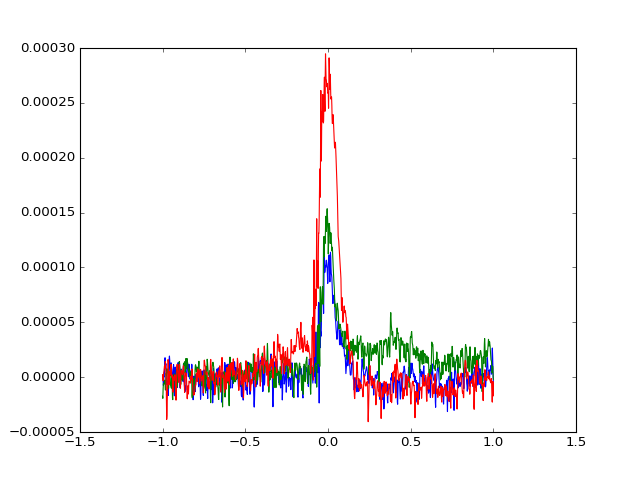

In [7]:
### STUDENT ANSWER
plt_events = data[:3, 0]
# Make sure to transpose our plot data so the first dimension is time.
f, ax = plt.subplots()
ax.plot(time, plt_events.T)

* Now plot 3 random epochs (use the `numpy.random.randint` function to create 3 random integers)

<IPython.core.display.Javascript object>


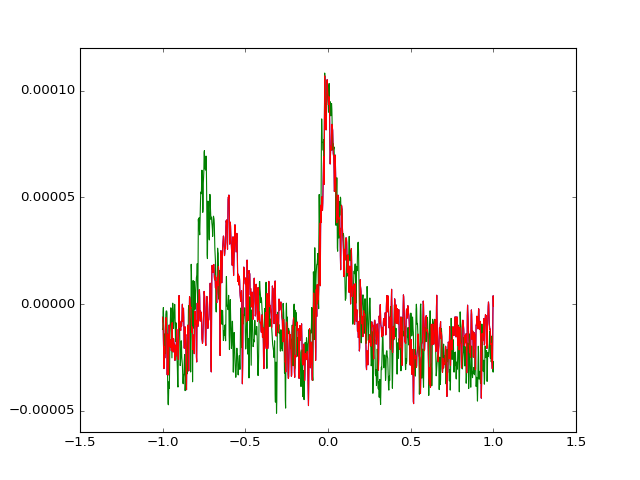

In [8]:
### STUDENT ANSWER
plt_events = data[np.random.randint(0, data.shape[0], 3), 0]
# Make sure to transpose our plot data so the first dimension is time.
f, ax = plt.subplots()
ax.plot(time, plt_events.T)

* Do all of these events look the same to you? You can re-run the `randint` code a bunch of times and it'll give you different results each time.
* Average across the first dimension of your eyeblinks data. The first dimension is `epochs`, so we are averaging across epochs.
* Now plot the average eyeblink for each channel.

<IPython.core.display.Javascript object>


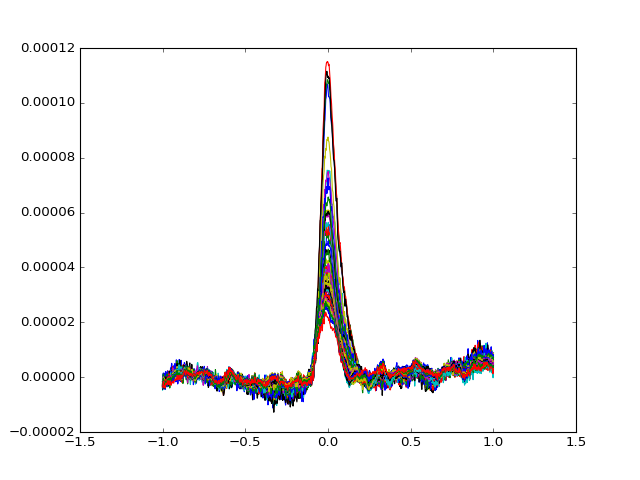

In [9]:
### STUDENT ANSWER
blink_mean = data.mean(axis=0)
f, ax = plt.subplots()
_ = ax.plot(time, blink_mean.T)

# Plotting with MNE
As we have discovered, MNE handles a lot of these cases more easily and more quickly than plotting it by hand. In this case, we can easily plot all events, as well as do some quick average plotting.

* First, plot all of the eyeblink events using the `Epochs` object that was returned by our eyeblink algorithm. Remember to use `scalings='auto'`. Plot only 5 epochs at a time.

<IPython.core.display.Javascript object>


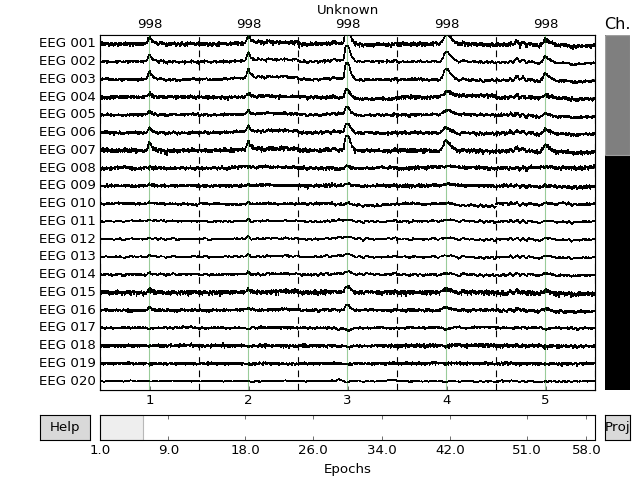

In [10]:
### STUDENT ANSWER
_ = blinks.plot(scalings='auto', n_epochs=5)

* Do all of the blinks occur evenly throughout the channels? 
* Now, create the average eyeblink for each channel with MNE. Use the `.average` method. This will return an `Evoked` object, which is how MNE represents the *average* activity during an epoch.
* Now call the `.plot` method of our `Evoked` object to see the average waveform.

<IPython.core.display.Javascript object>


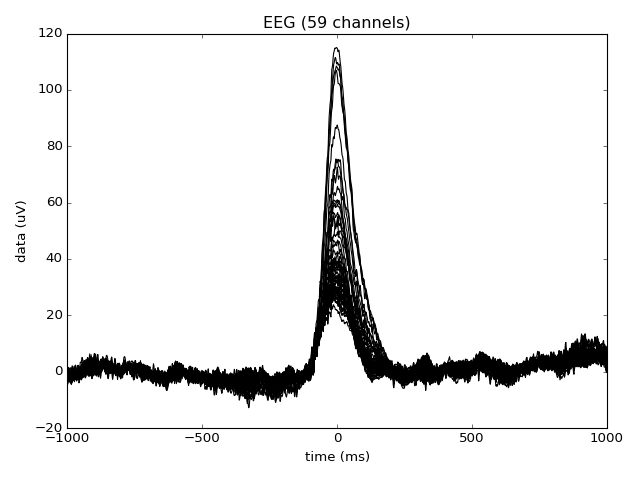

In [11]:
### STUDENT ANSWER
# The blinks do not all occur evenly through the channels. They are stronger in some, weak in others.

# Now plot the average for all channels with MNE
av = blinks.average()
_ = av.plot()

Now we'll try to figure out where these eyeblinks are coming from (though you could probably guess on your own).

* Plot the scalp topographies of the events. Use the `.plot_joint` method of the `Evoked` object you created above to plot both the scalp topography, as well as the waveforms, for each event. 

<IPython.core.display.Javascript object>


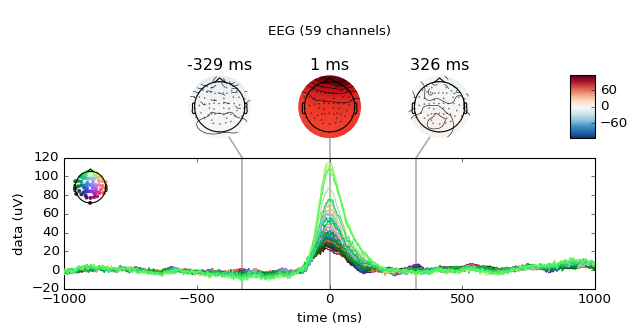

In [12]:
### STUDENT ANSWER

_ = av.plot_joint()

> * How does this compare with the topographic maps that we calculated in the lecture? What difference did it make when we baselined each channel?

In [13]:
### STUDENT ANSWER
# After baselining, the times in which the eyeblinks occur is much more clear. Now,
# the topography before and after each blink looks totally white, whereas the topography
# during the eyeblink is clearly different.

# Correcting the eyeblinks
Now that we've got a good idea for what these eyeblink waveforms look like, let's see if we can subtract them out of our data. We've already calculated the "average" eyeblink for each channel. We can try to simply subtract this from all of the channels and see if that corrects for our eyeblinks.

* Pull the raw data from the `Evoked` object you created above. It exists at the `._data` attribute
* Copy the `Epochs` created above by the eyeblink detection algorithm (use the `.copy` method to do this.) 
* Subtract the `Evoked` data from the raw data in our new `Epochs` object.

In [14]:
### STUDENT ANSWER
corrected = blinks.copy()
corrected._data = corrected._data - av.data

* Then, re-do the plots you made above. Plot the new activity in the `Epochs` object.

<IPython.core.display.Javascript object>


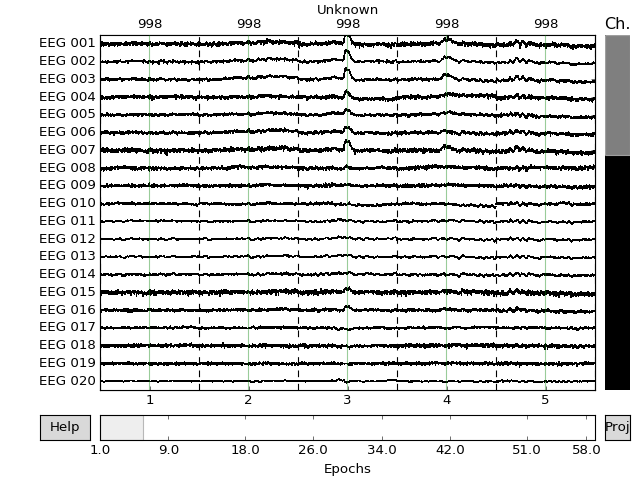

In [15]:
### STUDENT ANSWER
_ = corrected.plot(scalings='auto', n_epochs=5)

* Now, plot the average activity for this new epochs object.

<IPython.core.display.Javascript object>


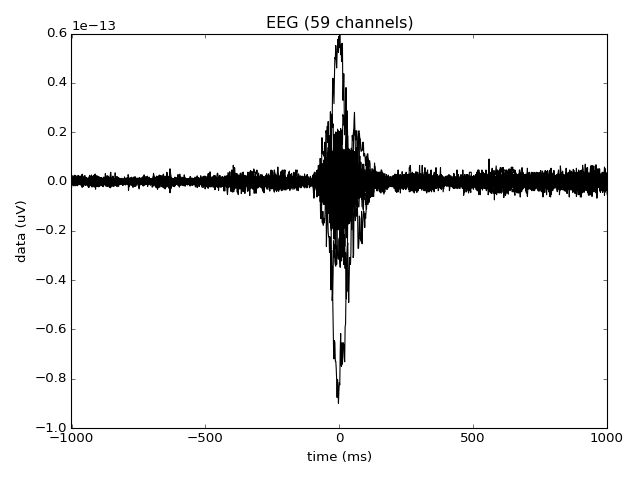

In [16]:
### STUDENT ANSWER

# Now, replot the data interactively
av_corr = corrected.average()
_ = av_corr.plot()

* Now, restrict the times to -.5 to .5 seconds. (Use the *crop* function)
* Re-plot the average activity

<IPython.core.display.Javascript object>


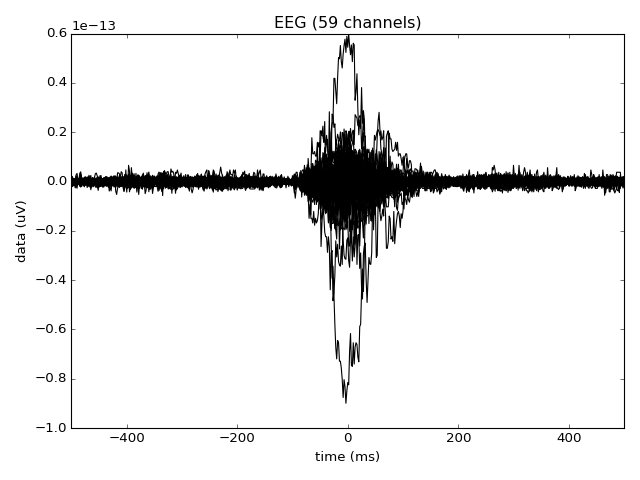

In [17]:
### STUDENT ANSWER

av_corr.crop(-.5, .5)
_ = av_corr.plot()

It still seems like there's a lot going on, but take a look at the y-axis. It is different now. We can more directly compare this below...

* Set the y-axis limits to the same values you plotted before subtracting the average eyeblinks
  * You can do this with the `ylim` parameter of the *plot* function.
  * This takes a dictionary of `electrode_type: ylim` pairs.
  * So you can pass `dict(eeg=[y_lim_low, y_lim_hi])`.
* What happened to the average eyeblink for each channel?

<IPython.core.display.Javascript object>


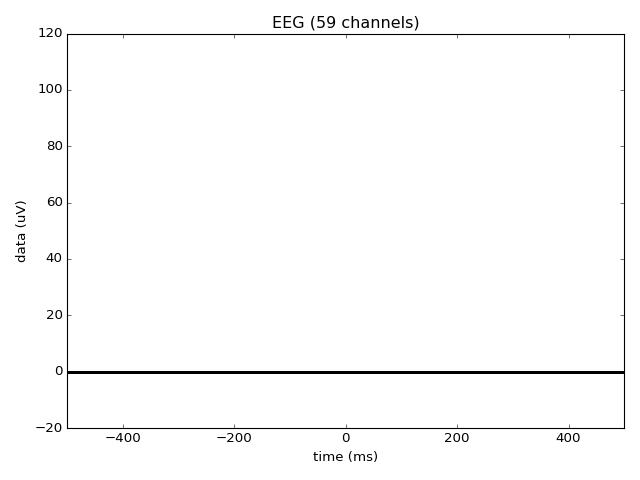

In [18]:
### STUDENT ANSWER

_ = av_corr.plot(ylim={'eeg': [-20, 120]})

# Now it's clear that the average eyeblinks are all very close to zero.

* Finally, make the topo plot again (using `plot_joint`)

<IPython.core.display.Javascript object>


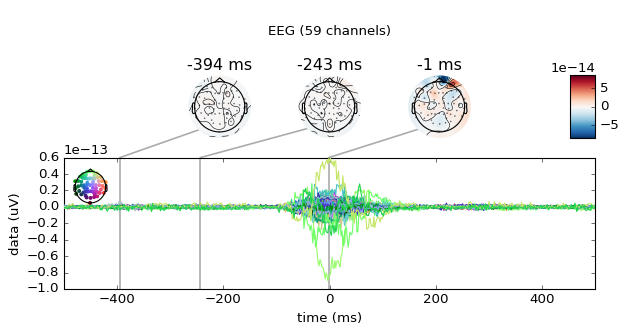

In [19]:
### STUDENT ANSWER

_ = av_corr.plot_joint()

* Does the data look cleaner now? Why or why not?
* How did the scalp topography change? And why is this?
* Did it work equally for all channels? Why do you think this is?

In [20]:
### STUDENT ANSWER
# It definitely looks cleaner in the sense that the amplitude of these plots is
# much smaller than it was before (it's basically 0). However there are some channels
# that are still moving around. Looking at the scalp topography, they seem to be near
# the front of the head as well. So perhaps we over-corrected some of the eyeblinks, or
# didn't correct enough. This is a common problem, but hopefully it won't have a big effect
# because the amplitudes are so small.

# Eyeblinks in ECoG Data
We'll finish up by looking at eyeblink activity in electrocorticography, which is related to EEG but has important differences. Thus far we've looked at eyeblinks in the context of EEG, but what do they look like for a much more invasive procedure liks ECoG?

In [21]:
# Load some ecog data
path_ecog = nds.io.data_list['ecog'] + 'chords_task/ecog-raw.fif'

Load the raw data given in path_ecog (use MNE's io function)

In [22]:
### STUDENT ANSWER
raw = mne.io.Raw(path_ecog, preload=True)

Opening raw data file /home/shared/cogneuro-connector/data/ecog/chords_task/ecog-raw.fif...
Isotrak not found
    Range : 0 ... 669928 =      0.000 ...   439.044 secs
Ready.
Reading 0 ... 669928  =      0.000 ...   439.044 secs...


In [23]:
print(raw._data.shape)

(64, 669929)


* Run the eyeblink algorithm on this dataset. Use channel 'ch_33' as the EOG channel.

In [24]:
### STUDENT ANSWER

# Run the eyeblink algorithm on it
epochs = mne.preprocessing.create_eog_epochs(raw, 'ch_33')

Using channel ch_33 as EOG channel
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Band-pass filtering from 2 - 45 Hz
Band-pass filtering from 1 - 10 Hz
Now detecting blinks and generating corresponding events
Number of EOG events detected : 364
364 matching events found
No baseline correction applied
Loading data for 364 events and 1527 original time points ...
0 bad epochs dropped


* Visualize the activity for the eyeblinks that the algorithm found. Only show 5 epochs.

<IPython.core.display.Javascript object>


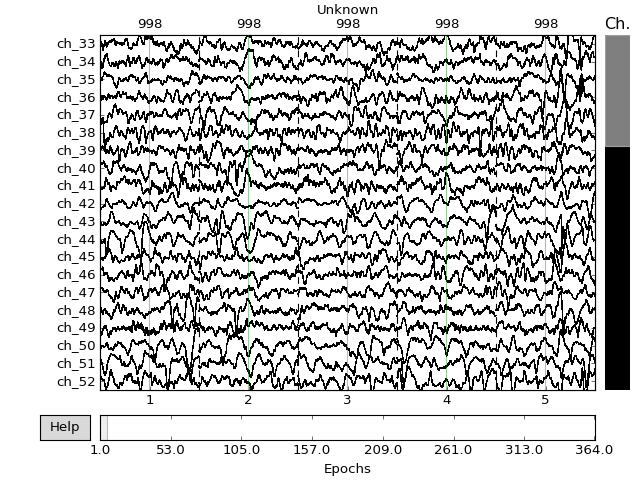

In [25]:
### STUDENT ANSWER

_ = epochs.plot(scalings='auto', n_epochs=5)

* How does each epoch look compared with our last dataset (EEG)?
* Do you think eyeblinks are a bigger or a smaller problem here?

In [26]:
### STUDENT ANSWER
# The eyeyblinks don't show up in the raw data nearly as clearly here.
# They seem smaller or non-existant.

* Let's try calculating the "average" eyeblink as above. Create an `Evoked` object from this data by averaging across trials.
* Now plot the average activity.

<IPython.core.display.Javascript object>


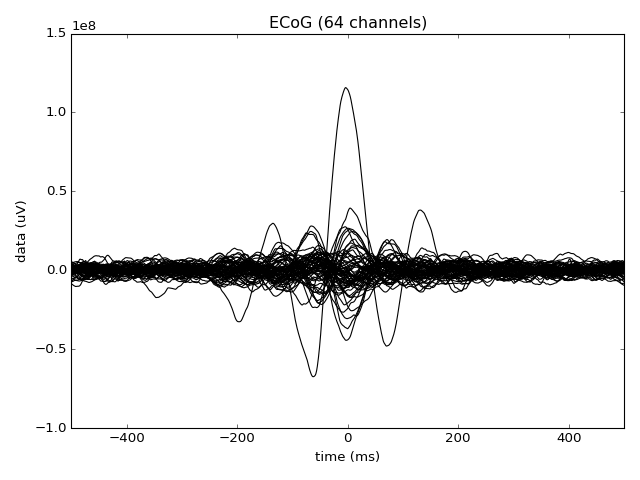

In [27]:
### STUDENT ANSWER
av = epochs.average()
_ = av.plot()

* How does this compare with what we saw before?
* Why do you think some lines are noisier than others? Are these eyeblinks?
* Why do you think this dataset would be different from the EEG dataset?

In [28]:
### STUDENT ANSWER
# This doesn't have as clear of a shape as the EEG data had. This is because there aren't really
# strong eyeblinks in ECoG data. So when we run the eyeblink detection algorithm, it will find
# waveforms that look "kind of" like eyeblinks, but aren't really eyeblinks. So, when we plot
# the averages above, we get weird looking plots that don't resemble the clear eyeblinks from
# before. This is a cautionary tale, as many algorithms will give you an answer regardless of
# whether it's reasonable or not.

### Other notes
This is only one way that you could detect eyeblinks. In practice, we have much more complicated techniques to detect these kinds of noise in the brain.

For one example, here is how you can use an algorithm called "Independent Components Analysis" (ICA) to extract an ECG signal embedded in the neural signals (ECG is related to heart activity).

This algorithm simultaneously considers the activity across all channels in order to determine the shape of the noisy signal, and then subtracts it out.

http://martinos.org/mne/dev/auto_examples/preprocessing/plot_run_ica.html#sphx-glr-auto-examples-preprocessing-plot-run-ica-py